In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import xpart as xp
import xtrack as xt

fname_model = './generate_models/lhc_at_collisions.json'

nemitt_x = 2.5e-6
nemitt_y = 2.5e-6

collider = xt.Multiline.from_json(fname_model)
collider.build_trackers()

Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


## Exploring the LHC

The two beamlines are accessible through `collider.lhcb1` and `collider.lhcb2`. Some examples on how we can access the elements of the lines.

### Enumerate elements and their names

In [2]:
collider.lhcb1.element_names  # Element names

('ip3',
 'drift_0',
 'mcbwv.4r3.b1',
 'drift_1',
 'bpmw.4r3.b1',
 'drift_2',
 'mqwa.a4r3.b1..1',
 'drift_3',
 'mqwa.a4r3.b1..2',
 'drift_4',
 'mqwa.a4r3.b1',
 'drift_5',
 'mqwa.a4r3.b1..3',
 'drift_6',
 'mqwa.a4r3.b1..4',
 'drift_7',
 'mqwa.b4r3.b1..1',
 'drift_8',
 'mqwa.b4r3.b1..2',
 'drift_9',
 'mqwa.b4r3.b1',
 'drift_10',
 'mqwa.b4r3.b1..3',
 'drift_11',
 'mqwa.b4r3.b1..4',
 'drift_12',
 'mqwb.4r3.b1..1',
 'drift_13',
 'mqwb.4r3.b1..2',
 'drift_14',
 'mqwb.4r3.b1',
 'drift_15',
 'mqwb.4r3.b1..3',
 'drift_16',
 'mqwb.4r3.b1..4',
 'drift_17',
 'mqwa.c4r3.b1..1',
 'drift_18',
 'mqwa.c4r3.b1..2',
 'drift_19',
 'mqwa.c4r3.b1',
 'drift_20',
 'mqwa.c4r3.b1..3',
 'drift_21',
 'mqwa.c4r3.b1..4',
 'drift_22',
 'mqwa.d4r3.b1..1',
 'drift_23',
 'mqwa.d4r3.b1..2',
 'drift_24',
 'mqwa.d4r3.b1',
 'drift_25',
 'mqwa.d4r3.b1..3',
 'drift_26',
 'mqwa.d4r3.b1..4',
 'drift_27',
 'tcsg.4r3.b1',
 'drift_28',
 'mqwa.e4r3.b1..1',
 'drift_29',
 'mqwa.e4r3.b1..2',
 'drift_30',
 'mqwa.e4r3.b1',
 'drift_31',


In [3]:
collider.lhcb2.elements  # Element objects

(<xtrack.beam_elements.elements.Marker at 0x7feb9fd21b70>,
 ...)

### Access the properties of individual elements

In [4]:
collider.lhcb1['ip1']  # A marker element at one of the collision points (ATLAS experiment)

In [5]:
collider.lhcb1['mb.b18l3.b1..1']  # A bending magnet

In [6]:
collider.lhcb1['mb.b18l3.b1..1'].to_dict()  # We can view its properties

{'__class__': 'Multipole',
 'order': 0,
 'inv_factorial_order': 1.0,
 'length': 7.15,
 'hxl': 0.002549994037004702,
 'hyl': 0.0,
 'radiation_flag': 0,
 'knl': array([0.00254999]),
 'ksl': array([0.])}

In [7]:
# A quadrupole
collider.lhcb1['mqwa.a4l3.b1..2']
collider.lhcb1['mqwa.a4l3.b1..2'].to_dict()

{'__class__': 'Multipole',
 'order': 1,
 'inv_factorial_order': 1.0,
 'length': 0.777,
 'hxl': 0.0,
 'hyl': 0.0,
 'radiation_flag': 0,
 'knl': array([0.        , 0.00096448]),
 'ksl': array([0., 0.])}

### Twiss

Compute orbit, optics and other quantities of interest.

In [8]:
# Compute the twiss for the first beamline
twb1 = collider.lhcb1.twiss()

# Compute the twiss for the second beamline, and reverse it to have the two in the same reference frame
twb2 = collider.lhcb2.twiss().reverse()

### Measure the tune

In [9]:
num_turns = 500

p_co = twb1.particle_on_co.copy()

collider.lhcb1.track(p_co, num_turns=num_turns, turn_by_turn_monitor=True)
mon_co = collider.lhcb1.record_last_track

p1 = twb1.particle_on_co.copy()
p1.x += 0.1e-3
p1.y += 0.2e-3
collider.lhcb1.track(p1, num_turns=num_turns, turn_by_turn_monitor=True)
mon1 = collider.lhcb1.record_last_track

Text(0, 0.5, 'y [m]')

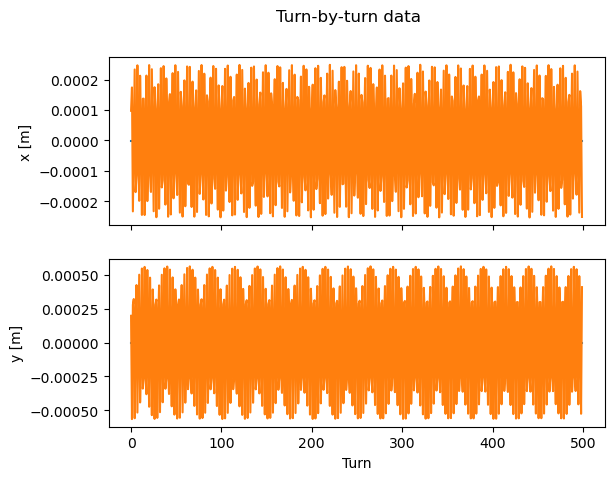

In [10]:
# Plot turn-by-turn data
fig, (spx, spy) = plt.subplots(nrows=2, ncols=1, sharex=True)
fig.suptitle('Turn-by-turn data')
spx.plot(mon_co.x.T)
spx.plot(mon1.x.T)
spy.plot(mon_co.y.T)
spy.plot(mon1.y.T)
spy.set_xlabel('Turn')
spx.set_ylabel('x [m]')
spy.set_ylabel('y [m]')

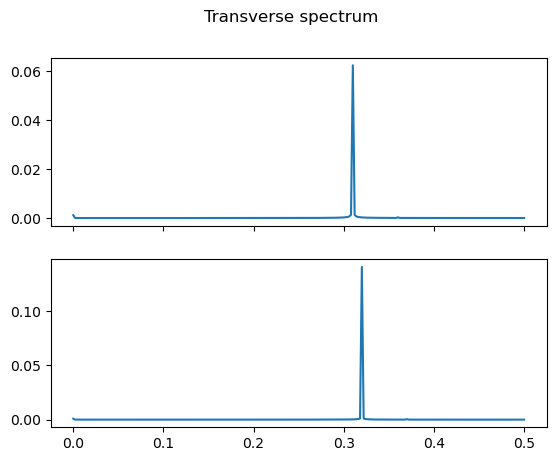

In [11]:
# Plot the transverse spectrum
fig, (spx, spy) = plt.subplots(nrows=2, ncols=1, sharex=True)
fig.suptitle('Transverse spectrum')
freq_axis = np.fft.rfftfreq(n=num_turns)
spx.plot(freq_axis, np.abs(np.fft.rfft(mon1.x[0, :])))
spy.plot(freq_axis, np.abs(np.fft.rfft(mon1.y[0, :])))

Text(0.5, 0.98, "$q_x$ = 62.31001 $q_y$ = 60.32001\n$Q'_x$ = 2.04 $Q'_y$ = 3.06 $\\gamma_{tr}$ = 53.54")

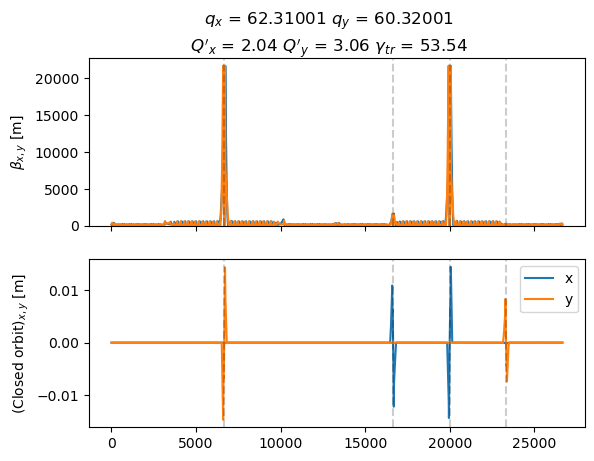

In [55]:
fig, (spbet, spco) = plt.subplots(nrows=2, ncols=1, sharex=True)
tw = twb1
spbet.plot(tw['s'], tw['betx'])
spbet.plot(tw['s'], tw['bety'])
spbet.set_ylim(bottom=0)
spco.plot(tw['s'], tw['x'], label='x')
spco.plot(tw['s'], tw['y'], label='y')
spco.legend()
spbet.set_ylabel(r'$\beta_{x,y}$ [m]')
spco.set_ylabel(r'(Closed orbit)$_{x,y}$ [m]')

# vertical lines at IPs with labels next to them at the top of the plot
for ip in ['ip1', 'ip2', 'ip5', 'ip8']:
    spbet.axvline(x=tw['s', ip], color='k', alpha=0.2, linestyle='--')
    spco.axvline(x=tw['s', ip], color='k', alpha=0.2, linestyle='--')


fig.suptitle(
    r'$q_x$ = ' f'{tw["qx"]:.5f}' r' $q_y$ = ' f'{tw["qy"]:.5f}' '\n'
    r"$Q'_x$ = " f'{tw["dqx"]:.2f}' r" $Q'_y$ = " f'{tw["dqy"]:.2f}'
    r' $\gamma_{tr}$ = '  f'{1/np.sqrt(tw["momentum_compaction_factor"]):.2f}'
)

### Survey

In [16]:
# Run the survey
sv1 = collider.lhcb1.survey(element0='ip1')
sv2 = collider.lhcb2.survey(element0='ip1').reverse()

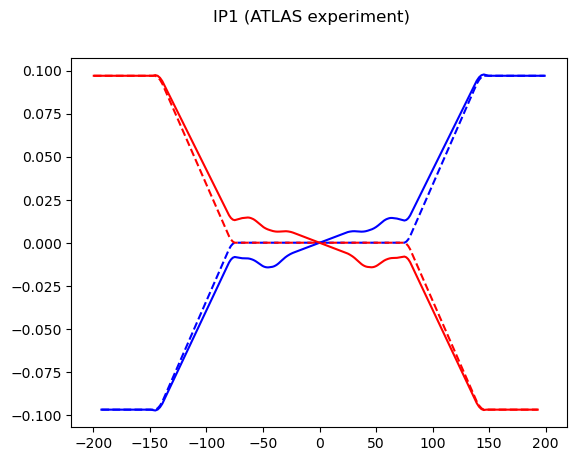

In [52]:
# Draw the plot
offset = 200.

twb1_ir1 = twb1.rows[twb1['s', 'ip1']-offset:twb1['s', 'ip1']+offset:'s']
svb1_ir1 = sv1.rows[sv1['s', 'ip1']-offset:sv1['s', 'ip1']+offset:'s']

twb2_ir1 = twb2.rows[twb2['s', 'ip1']-offset:twb2['s', 'ip1']+offset:'s']
svb2_ir1 = sv2.rows[sv2['s', 'ip1']-offset:sv2['s', 'ip1']+offset:'s']

fig, ax = plt.subplots()
fig.suptitle('IP1 (ATLAS experiment)')
ax.plot(svb1_ir1.Z, svb1_ir1.X, label='x', linestyle='--', color='b')
ax.plot(svb2_ir1.Z, svb2_ir1.X, label='y', linestyle='--', color='r')

ax.plot(svb1_ir1.Z, svb1_ir1.X + twb1_ir1.x, label='x', linestyle='-', color='b')
ax.plot(svb2_ir1.Z, svb2_ir1.X + twb2_ir1.x, label='y', linestyle='-', color='r')

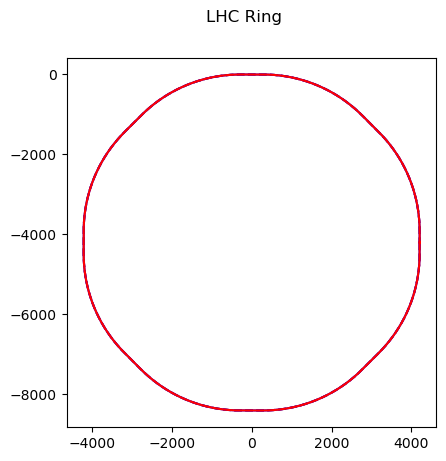

In [53]:
# See the whole ring
fig, ax = plt.subplots()
fig.suptitle('LHC Ring')
ax.set_box_aspect(1)
ax.plot(sv1.Z, sv1.X, label='x', linestyle='--', color='b')
ax.plot(sv2.Z, sv2.X, label='y', linestyle='--', color='r')

ax.plot(sv1.Z, sv1.X + twb1.x, label='x', linestyle='-', color='b')
ax.plot(sv2.Z, sv2.X + twb2.x, label='y', linestyle='-', color='r')